# DESKRIPSI PROJEK





<p> Berikut ini adalah deskripsi dari masing-masing dataset: </p>


1. ph --> ph air
2. Hardness --> kapasitas air untuk mengendapkan sabun dalam mg/L
3. Solids --> Total larutan padat dalam ppm
4. Chloramines --> Jumlah kloramin dalam ppm
5. Sulfate --> Jumlah sulfat yang larut di mg/L
6. Conductivity --> kandungan konduktivitas
7. Organic_carbon --> kandungan karbon organik
8. Trihalomethanes --> kandungan trihalometana di μg/L
9. Turbidity --> Ukuran pada properti pemancar cahaya air di NTU (Nephelometric Turbidity Unit)
10. Potability --> Indikasi jika air bersih untuk minum atau tidak (0 = tidak, 1 = ya) 


Source: [Kaggle](https://www.kaggle.com/datasets/adityakadiwal/water-potability)




# Import Library 

In [18]:
import pandas as pd

# Membaca Dataset

In [19]:
df = pd.read_csv('data/water_potability.csv')

# Exploratory Data Analysis

In [20]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


 pada data info diatas dapat dilihat bahwa nilai dari semua fitur bertipe float64

In [22]:
# check dimensions of the data
df.shape

(3276, 10)

In [23]:
# check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [24]:
# Save a feature who have missing values in a list
missing_values = df.columns[df.isnull().sum() > 0].tolist()

# check the percentage of missing values
df[missing_values].isnull().sum() / df.shape[0] 

# convert into percentage
df[missing_values].isnull().sum() / df.shape[0] * 100



ph                 14.987790
Sulfate            23.840049
Trihalomethanes     4.945055
dtype: float64

In [25]:
# karena missing values nya lebih dari 10% maka kita akan menggunakan teknik mean imputation
# Mean imputation
for col in missing_values:
    df[col].fillna(df[col].mean(), inplace=True)

# check for missing values
df.isnull().sum()

# check the percentage of missing values
df[missing_values].isnull().sum() / df.shape[0] * 100

ph                 0.0
Sulfate            0.0
Trihalomethanes    0.0
dtype: float64

# Data Preprocessing

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Potability', axis=1)
y = df['Potability'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y_train)
print('Before SMOTE', counter)
X_train, y_train = smt.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('\nAfter SMOTE', counter)

################################# Scaling #################################
ssc = StandardScaler()

X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

modelAccuracy = list()

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({0: 1598, 1: 1022})

After SMOTE Counter({0: 1598, 1: 1598})


# Training Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

model = [DecisionTreeClassifier(), RandomForestClassifier()] 

# set time train and test accuracy



trainAccuracy = list()
testAccuracy = list()
time = list()

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    time.append(trainResult.std())
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)



In [28]:
print("Perbandingan Akurasi Model")
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy, 'Time' : time})

modelScore['Model'] = modelScore['Model'].astype(str)

modelScore['Model'] = modelScore['Model'].apply(lambda x: x.split('(')[0])

modelScore

Perbandingan Akurasi Model


,Model,Train_Accuracy,Test_Accuracy,Time
0,DecisionTreeClassifier,0.619522,0.545732,0.014413
1,RandomForestClassifier,0.711510,0.618902,0.025862


Random Forest Classifier

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       400
           1       0.56      0.48      0.51       256

    accuracy                           0.65       656
   macro avg       0.63      0.62      0.62       656
weighted avg       0.64      0.65      0.64       656

None


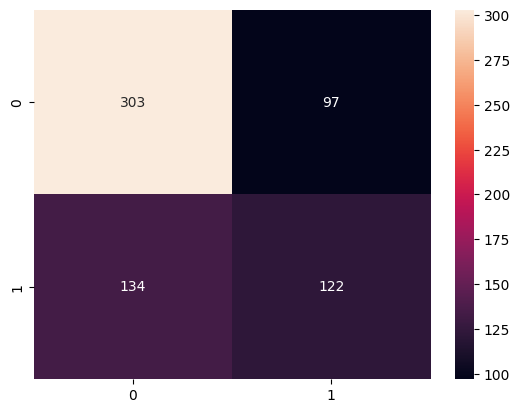

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
print('Random Forest Classifier\n')
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

y_Rfc = Rfc.predict(X_test)
print(metrics.classification_report(y_test, y_Rfc))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_Rfc)))

sns.heatmap(confusion_matrix(y_test, y_Rfc), annot=True, fmt='d')
plt.show()

In [30]:
# save to csv
modelScore.to_csv('data/modelScore.csv', index=False)